In [4]:
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import os

In [2]:
csv_path = os.getenv('HOME') + '/aiffel/data_visualization/data/AMZN.csv'
data = pd.read_csv(csv_path, index_col = 0, parse_dates = True)
price = data['Close']

# 1. Line Plot

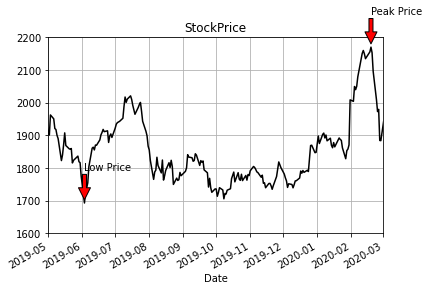

In [6]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)
price.plot(ax=ax, style='black')
plt.ylim([1600, 2200])
plt.xlim(['2019-05-01', '2020-03-01'])

# 주석달기
important_data = [(datetime(2019, 6, 3), "Low Price"), (datetime(2020, 2, 19), "Peak Price")]
for d, label in important_data:
    ax.annotate(label, xy=(d, price.asof(d)+10),    # 주석을 달 좌표(x,y)
                xytext=(d, price.asof(d)+100),      # 주석 텍스트가 위치할 좌표(x,y)
                arrowprops=dict(facecolor='red'))   # 화살표 추가 및 색 설정

# 그리드, 타이틀 달기
plt.grid()
ax.set_title('StockPrice')

# 보여주기
plt.show()

# 2. Plot usage

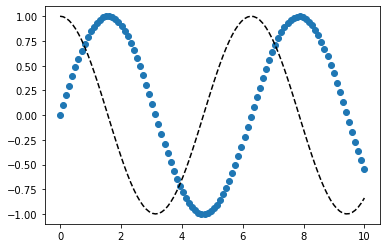

In [9]:
import numpy as np

x = np.linspace(0, 10, 100)   # from 0 to 10, same interval, create 100 numbers

plt.plot(x, np.sin(x), 'o')
plt.plot(x, np.cos(x), '--', color='black')
plt.show()

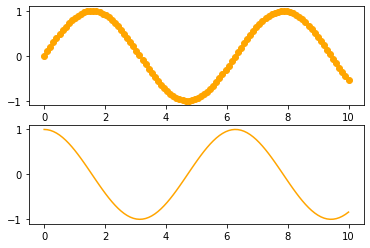

In [10]:
x = np.linspace(0, 10, 100)

plt.subplot(2,1,1)
plt.plot(x, np.sin(x), 'o', color='orange')


plt.subplot(2,1,2)
plt.plot(x, np.cos(x), 'orange')
plt.show()

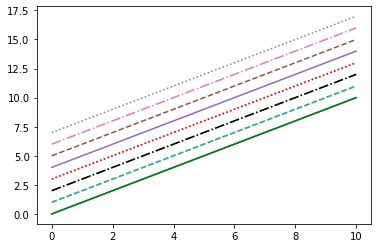

In [11]:
x = np.linspace(0, 10, 100) 

plt.plot(x, x + 0, linestyle='solid') 
plt.plot(x, x + 1, linestyle='dashed') 
plt.plot(x, x + 2, linestyle='dashdot') 
plt.plot(x, x + 3, linestyle='dotted')

plt.plot(x, x + 0, '-g') # solid green 
plt.plot(x, x + 1, '--c') # dashed cyan 
plt.plot(x, x + 2, '-.k') # dashdot black 
plt.plot(x, x + 3, ':r'); # dotted red
plt.plot(x, x + 4, linestyle='-') # solid 
plt.plot(x, x + 5, linestyle='--') # dashed 
plt.plot(x, x + 6, linestyle='-.') # dashdot 
plt.plot(x, x + 7, linestyle=':'); # dotted

In [12]:
pandas.plot 메서드 인자
label: 그래프의 범례 이름
ax: 그래프를 그릴 matplotlib의 서브플롯 객체
style: matplotlib에 전달할 'ko--'같은 스타일의 문자열
alpha: 투명도 (0 ~1)
kind: 그래프의 종류: line, bar, barh, kde
logy: Y축에 대한 로그 스케일
use_index: 객체의 색인을 눈금 이름으로 사용할지의 여부
rot: 눈금 이름을 로테이션(0 ~ 360)
xticks, yticks: x축, y축으로 사용할 값
xlim, ylim: x축, y축 한계
grid: 축의 그리드 표시할지 여부

SyntaxError: invalid syntax (2382975775.py, line 1)

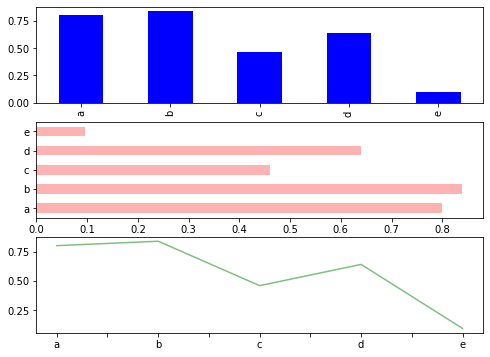

In [18]:
fig, axes = plt.subplots(3, 1, figsize=(8,6))

data = pd.Series(np.random.rand(5), index=list('abcde'))
data.plot(kind='bar', ax=axes[0], color='blue', alpha=1)
data.plot(kind='barh', ax=axes[1], color='red', alpha=0.3)
data.plot(kind='line', ax=axes[2], color='green', alpha=0.5)
plt.show()

## 그래프를 그리는 과정

1. fig = plt.figure(): figure 객체를 선언해 '도화지를 펼쳐'줍니다.
2. ax1 = fig.add_subplot(1,1,1): 축을 그립니다.
3. ax1.bar(x, y) 축 안에 어떤 그래프를 그릴지 메서드를 선택한 다음, 인자로 데이터를 넣어줍니다.
4. 그래프 타이틀 축의 레이블 등을 plt의 여러 메서드 grid, xlabel, ylabel 을 이용해서 추가해 주고 
5. plt.savefig 메서드를 이용해 저장해줍니다.

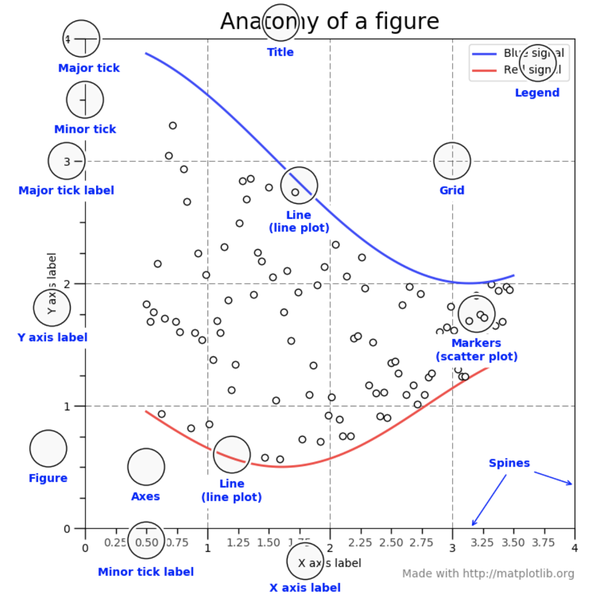


# 3. 그래프 더 알아보기

In [19]:
import pandas as pd
import seaborn as sns

In [20]:
tips = sns.load_dataset('tips')

# 3-1. Data 살펴보기

In [21]:
df = pd.DataFrame(tips)
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [23]:
df.shape

(244, 7)

In [24]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


# 3-2. 범주형 데이터

## 1) 막대형

In [34]:
#tip을 별에 대한 평균으로 나타내려면

grouped = df['tip'].groupby(df['sex'])

In [35]:
grouped

In [36]:
grouped.mean()

sex
Male      3.089618
Female    2.833448
Name: tip, dtype: float64

In [37]:
grouped.size()

sex
Male      157
Female     87
Name: tip, dtype: int64

In [38]:
#딕셔너리 형태로 만들어주기

import numpy as np
sex = dict(grouped.mean())
sex

{'Male': 3.0896178343949043, 'Female': 2.833448275862069}

In [39]:
x = list(sex.keys())
x

['Male', 'Female']

In [40]:
y = list(sex.values())
y

[3.0896178343949043, 2.833448275862069]

Text(0.5, 1.0, 'Title by Sex')

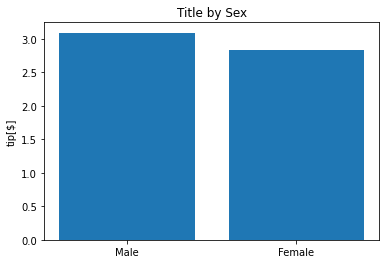

In [41]:
import matplotlib.pyplot as plt

plt.bar(x=x, height=y)
plt.ylabel('tip[$]')
plt.title('Title by Sex')

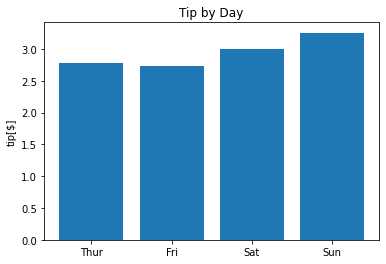

In [42]:
# Q. 요일(day)에 따른 평균 tip의 그래프를 그려보세요.

grouped = df['tip'].groupby(df['day'])
date_mean= dict(grouped.mean()) 
x = list(date_mean.keys())
y = list(date_mean.values())

plt.bar(x=x, height=y)

plt.ylabel('tip[$]')
plt.title('Tip by Day')
plt.show()

## 2) Seaborn

<AxesSubplot:xlabel='sex', ylabel='tip'>

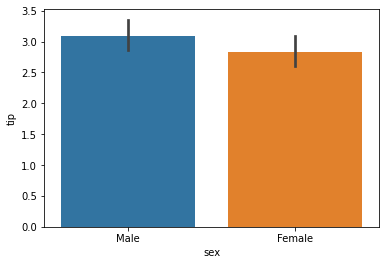

In [43]:
sns.barplot(data=df, x='sex', y='tip')

Text(0.5, 1.0, 'Tip by Sex')

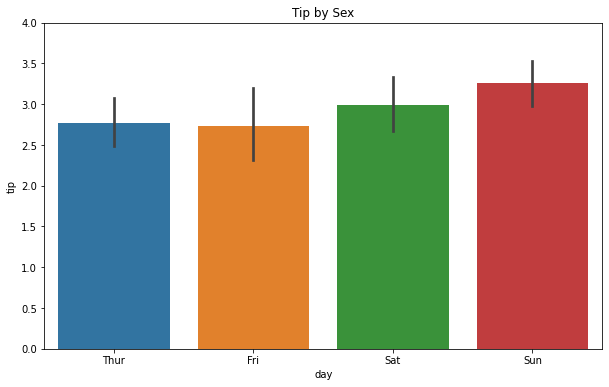

In [47]:
plt.figure(figsize=(10 ,6))
sns.barplot(data=df, x='day', y='tip')
plt.ylim(0,4)
plt.title('Tip by Sex')

<AxesSubplot:xlabel='day', ylabel='tip'>

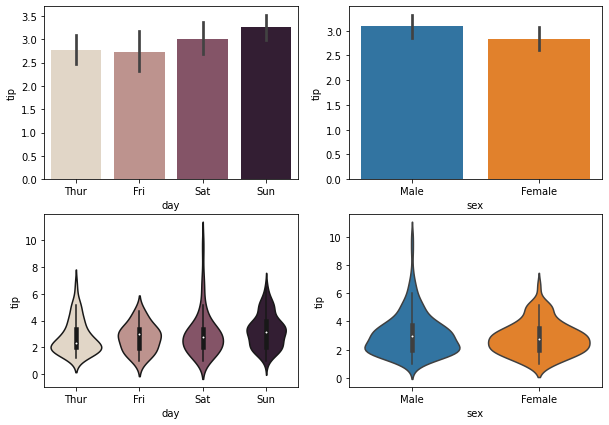

In [48]:
fig = plt.figure(figsize=(10,7))

ax1 = fig.add_subplot(2,2,1)
sns.barplot(data=df, x='day', y='tip', palette="ch:.25")

ax2 = fig.add_subplot(2,2,2)
sns.barplot(data=df, x='sex', y='tip')

ax3 = fig.add_subplot(2,2,4)
sns.violinplot(data=df, x='sex', y='tip')

ax4 = fig.add_subplot(2,2,3)
sns.violinplot(data=df, x='day', y='tip', palette="ch:.25")

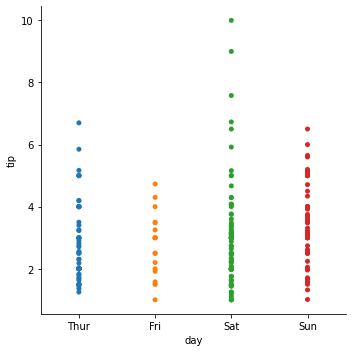

In [49]:
sns.catplot(x='day', y='tip', jitter=False, data=tips)

In [50]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


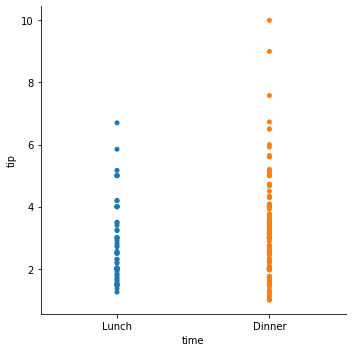

In [52]:
sns.catplot(x='time', y='tip', jitter=False, data=df)

## 3) Scatter

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

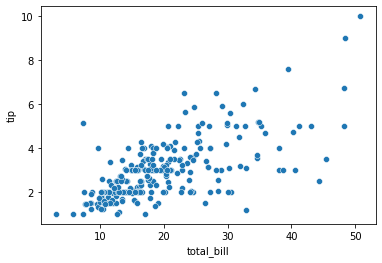

In [53]:
sns.scatterplot(data=df, x='total_bill', y='tip', palette='ch:r=-.2, d=.3_r')

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

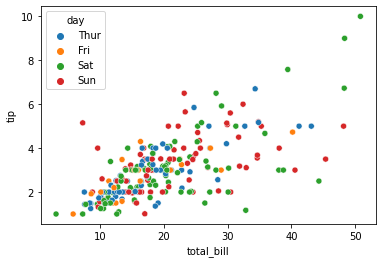

In [54]:
sns.scatterplot(data=df, x='total_bill', y='tip', hue='day')

## 4) Line Graph

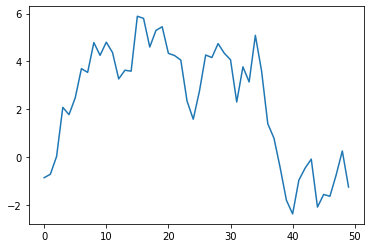

In [56]:
# np.random.randn 함수는 표준 정규분포에서 난수를 생성하는 함수입니다.
# cumsum()은 누적합을 구하는 함수입니다.

plt.plot(np.random.randn(50).cumsum())
plt.show()

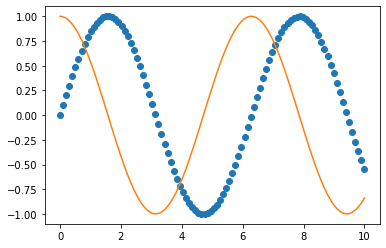

In [59]:
x = np.linspace(0, 10, 100)
plt.plot(x, np.sin(x), 'o')
plt.plot(x, np.cos(x))
plt.show()

<AxesSubplot:>

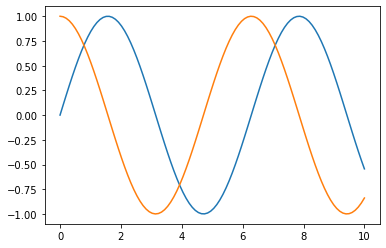

In [60]:
sns.lineplot(x=x, y=np.sin(x))
sns.lineplot(x=x, y=np.cos(x))

## 5) Histogram
- 도수분표표를 그래프로 나타낸 것 (가로 : 변수의 구간, bin, 세로 : 빈도수, frequency)

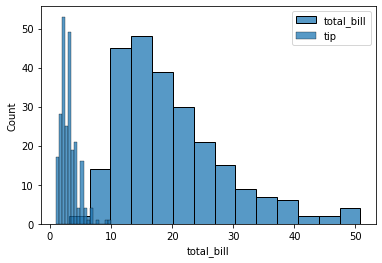

In [64]:
sns.histplot(df['total_bill'], label="total_bill")

# legend()를 이용하여 label을 표시해줍니다.
sns.histplot(df['tip'], label="tip").legend()

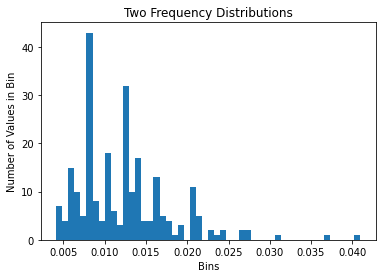

In [65]:
# Q. pyplot을 이용해서 그려봅시다.
# bin의 개수는 50개로 지정해주세요.

df['tip_pct'] = df['tip']/len(df['tip'])

fig = plt.figure()
ax1 = fig.add_subplot(1,1,1)

ax1 = plt.hist(df['tip_pct'], bins=50, density=False)  # bins는 x값을 총 50개 구간으로 나눈다는 뜻입니다.

# 라벨, 타이틀 달기
plt.xlabel('Bins')
plt.ylabel('Number of Values in Bin')
plt.title('Two Frequency Distributions')

# 보여주기
plt.show();


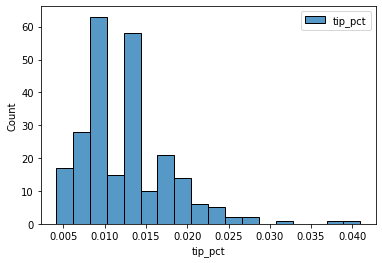

In [66]:
# Q. 이번에는 seaborn을 이용해서 그려봅시다.
sns.histplot(df['tip_pct'], label='tip_pct').legend()

# 4. 시계열 데이터

In [69]:
csv_path = os.getenv("HOME") + "/aiffel/data_visualization/data/flights.csv"
data = pd.read_csv(csv_path)
flights = pd.DataFrame(data)
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


<AxesSubplot:xlabel='year', ylabel='passengers'>

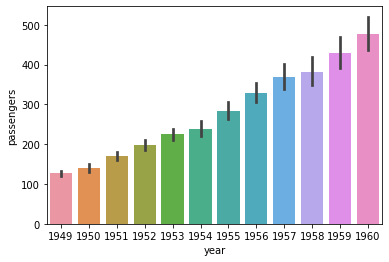

In [70]:
sns.barplot(data=flights, x= 'year', y='passengers')

<AxesSubplot:xlabel='year', ylabel='passengers'>

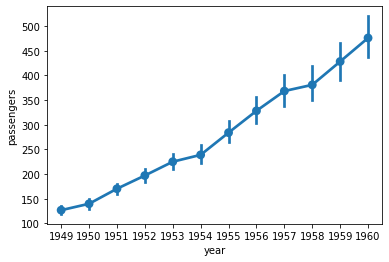

In [71]:
sns.pointplot(data=flights, x='year', y='passengers')

<AxesSubplot:xlabel='year', ylabel='passengers'>

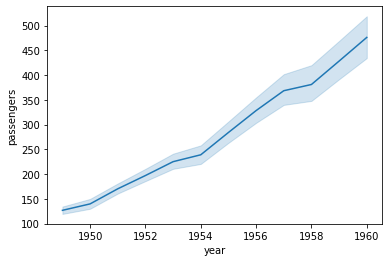

In [72]:
sns.lineplot(data=flights, x='year', y='passengers')

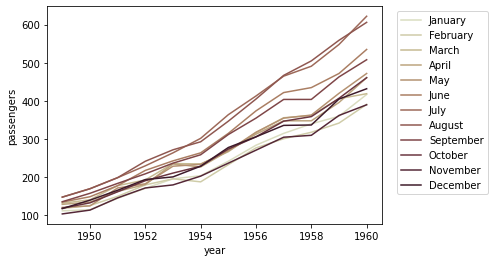

In [74]:
sns.lineplot(data=flights, x='year', y='passengers', hue='month', palette='ch:.50')

#legend 그래프 밖에 추가하기
plt.legend(bbox_to_anchor=(1.03, 1), loc=2)

<AxesSubplot:xlabel='passengers', ylabel='Count'>

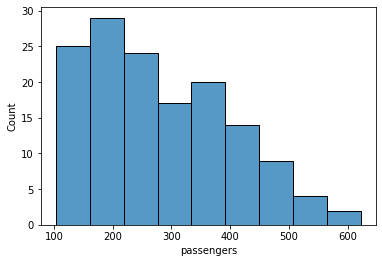

In [75]:
sns.histplot(flights['passengers'])

# 5. Heatmap

In [76]:
pivot = flights.pivot(index='year', columns='month', values='passengers')
pivot

month,April,August,December,February,January,July,June,March,May,November,October,September
year,,,,,,,,,,,,
1949,129,148,118,118,112,148,135,132,121,104,119,136
1950,135,170,140,126,115,170,149,141,125,114,133,158
1951,163,199,166,150,145,199,178,178,172,146,162,184
1952,181,242,194,180,171,230,218,193,183,172,191,209
1953,235,272,201,196,196,264,243,236,229,180,211,237
1954,227,293,229,188,204,302,264,235,234,203,229,259
1955,269,347,278,233,242,364,315,267,270,237,274,312
1956,313,405,306,277,284,413,374,317,318,271,306,355
1957,348,467,336,301,315,465,422,356,355,305,347,404


<AxesSubplot:xlabel='month', ylabel='year'>

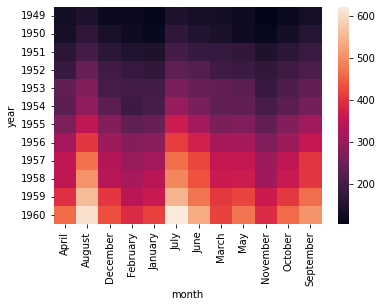

In [77]:
sns.heatmap(pivot)

<AxesSubplot:xlabel='month', ylabel='year'>

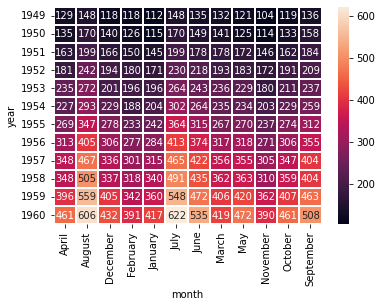

In [79]:
#heatmap cell 사이의 간격을 0.2로 지정합니다. (linewidths=.2)
#heatmap cell 안에 데이터 값을 넣고 (annot=True)
#데이터 값의 형식을 정수로 지정합니다. (fmt="d")

sns.heatmap(pivot, linewidth= .2, annot=True, fmt = 'd')

# 6. QUIZ

In [80]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

tips = sns.load_dataset("tips")

In [85]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='tip', ylabel='total_bill'>

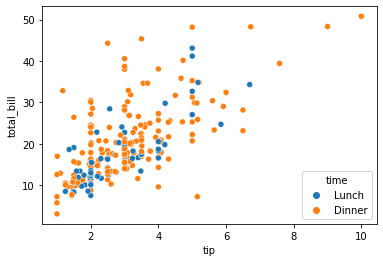

In [94]:
# Q. 시간대(time)에 따른 tip과 total_bill의 관계를 scatter plot으로 시각화해봅시다.


sns.scatterplot(data=tips, x='tip', y='total_bill', hue='time')

<Figure size 432x288 with 0 Axes>

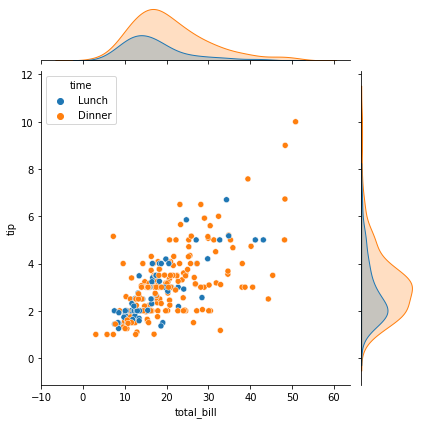

In [99]:
plt.figure()


sns.jointplot(data=tips, x= 'total_bill', y='tip', hue='time')